# Basic pyDyna execution

```
import pydyna

my_dyna = pydyna.create_simulation("exemplo.p3d")
my_dyna.step()
```

1. Create a simulation using the method `create_simulation`
1. Call the method `step()` to calculate one simulation step


# Handling vessels

Vessels can be accessed by property `vessels`

In [1]:
import pydyna

my_dyna = pydyna.create_simulation("exemplo.p3d")
print(list(my_dyna.vessels))

['30']


In [2]:
my_vessel = my_dyna.vessels['30']

print("30's linear position in meters:")
print(my_vessel.linear_position)
print()
print("And its angular position in radians:")
print(my_vessel.angular_position)


30's linear position in meters:
[ -6.70458084   4.13920455 -14.5       ]

And its angular position in radians:
[ 0.  0. 90.]


Some properties can be changed:

In [3]:
# Set a new linear position
my_vessel.linear_position = [1200.0, 800.0, -14.5]
my_vessel.linear_position = [-5.0, 0.0, 0.0]

print("Updated linear position:")
print(my_vessel.linear_position)

Updated linear position:
[-5.  0.  0.]


# Vessel control

One way to control any vessels is through its rudder and thrusters. If the vessel has them, you can access using the properties: `thrusters` and `rudders`. 

In [4]:
print("Thrusters:")
print(list(my_vessel.thrusters))
print("Rudders:")
print(list(my_vessel.rudders))


Thrusters:
['0', '4']
Rudders:
['0']


In [5]:
my_main_thruster = my_vessel.thrusters['0']
my_main_rudder = my_vessel.rudders['0']
my_main_thruster.dem_rotation = my_main_thruster.max_rotation

serie_t = []
serie_rps = []
serie_x = []
serie_y = []
serie_yaw = []

for one_cycle in range(4000):
    if one_cycle == 1000:
        my_main_rudder.dem_angle = -my_main_rudder.max_angle
    serie_t.append(my_dyna.get_time_step() * my_dyna.get_dt())
    serie_rps.append(my_main_thruster.eff_rotation)
    serie_x.append(my_vessel.linear_position[0])
    serie_y.append(my_vessel.linear_position[1])
    serie_yaw.append(my_vessel.angular_position[2])
    my_dyna.step()

In [6]:
import pandas as pd

data = pd.DataFrame({'t': serie_t, 'px': serie_x, 'py': serie_y, 'yaw': serie_yaw, 'rps': serie_rps})

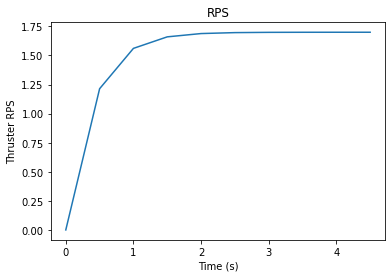

In [7]:
import matplotlib.pyplot as plt

subdata = data[:10]
plt.title("RPS")
plt.xlabel("Time (s)")
plt.ylabel("Thruster RPS")
plt.rcParams["figure.figsize"] = (16,8)
plt.plot(subdata['t'], subdata['rps'])

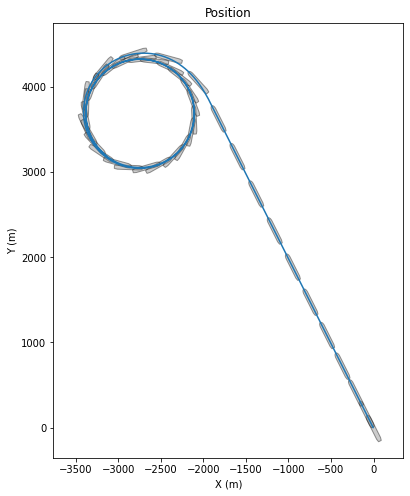

In [8]:
import math
import matplotlib.path as mpath
import matplotlib.patches as mpatches

fig, (ax1) = plt.subplots(1, 1)
ax1.set_aspect('equal')

Path = mpath.Path
path_data = [
    (Path.MOVETO, [0.0, -0.5]),
    (Path.LINETO, [-0.35, -0.5]),
    (Path.LINETO, [-0.5, -0.4]),
    (Path.LINETO, [-0.5, -0.35]),
    (Path.LINETO, [-0.5, 0.3]),
    (Path.CURVE4, [-0.5, 0.5]),
    (Path.CURVE4, [0.5, 0.5]),
    (Path.LINETO, [0.5, 0.3]),
    (Path.LINETO, [0.5, 0.3]),
    (Path.LINETO, [0.5, -0.35]),
    (Path.LINETO, [0.5, -0.4]),
    (Path.LINETO, [0.35, -0.5]),
    (Path.CLOSEPOLY, [0.0, -0.5])
]

codes, verts = zip(*path_data)
ship = [[x[0] * my_vessel.breadth, x[1] * my_vessel.length] for x in verts]

for key, t in enumerate(data['t']):
    if (key % 100) == 0:
        alpha = data['yaw'][key] - math.pi/2
        item = [[x[0] * math.cos(alpha) - x[1] * math.sin(alpha), 
            x[0] * math.sin(alpha) + x[1] * math.cos(alpha)] for x in ship]
        item = [[x[0] + data['px'][key], x[1] + data['py'][key]] for x in item]

        path = mpath.Path(item, codes)
        patch = mpatches.PathPatch(path, facecolor='gray', alpha=0.4)
        ax1.add_patch(patch)

ax1.plot(data['px'], data['py'])

ax1.set_title("Position")
ax1.set_xlabel("X (m)")
ax1.set_ylabel("Y (m)")

ax1.set_ylim(data['py'].min() - my_vessel.length, data['py'].max() + my_vessel.length)
ax1.set_xlim(data['px'].min() - my_vessel.length, data['px'].max() + my_vessel.length)


plt.show()

# External Force

Bank effect is a force calculated out of pyDyna. This is an example in how you can implement new forces on a vessel.

In pyDyna, external force is an object and it must be created using the vessel method `add_external_force`.

```
my_vessel.add_external_force('<force id>')
```

Once created, you can set forces and moments using:

```
my_vessel.extrnal_forces['<force id>'].force = [4.0, 7.0, 9.0]
```

where `[4.0, 7.0, 9.0]` represents the force components `x`, `y` and `z` respectively.
For moment, use:

```
my_vessel.extrnal_forces['<force id>'].moment = [800.0, 300.0, 200.0]
```


# Inhouse DP

Dois componentes: Cliente e Servidor

`DP4py.bat` é um script que auxilia na execução do Servidor. Este precisa que uma máquina virtual Java tenha sido instalada na plataforma onde será executada.



## Integração do pyDyna com o inHouse DP

In [10]:
import pydyna

try:
    my_dyna
except NameError:
    pass
else:
    my_dyna.reset()

my_dyna = pydyna.create_simulation("Maersk Handler.p3d")

## Lista dos `vessels` definidos no arquivo P3D

In [11]:
list(my_dyna.vessels)

['42']

## Checagem das propriedades do corpo. Configuração da posição linear e angular do corpo

In [12]:
my_vessel = my_dyna.vessels['42']
my_thrusters = list(my_vessel.thrusters)
my_vessel.linear_position = [0.0, 0.0, -6.6]
my_vessel.angular_position = [0.0, 0.0, 0.0]
print(my_vessel.linear_position)
print(my_vessel.angular_position)
print(my_thrusters)

[ 0.   0.  -6.6]
[0. 0. 0.]
['0', '1', '14', '4', '5']


## Exemplo inHouse DP 1

Aplicação de um degrau de 10.0m em Surge com os ganhos pré-definidos no arquivo P3D

In [14]:
import inhousedp
import math

my_dp = inhousedp.InhouseDP("D:/Users/betomaki/Desktop/grupo_code/20201216_evento_pydyna/example/Maersk Handler.p3d", 42)

serie_t = []
serie_x = []
serie_y = []
serie_yaw = []

my_dp.setreference([10.0, 0.0, 0.0])

for cycle in range(6000):
    serie_t.append(my_dyna.get_time_step() * my_dyna.get_dt())
    serie_x.append(my_vessel.linear_position[0])
    serie_y.append(my_vessel.linear_position[1])
    serie_yaw.append(my_vessel.angular_position[2])

    my_var = my_dp.dostep([
        my_vessel.linear_position[0],
        my_vessel.linear_position[1],
        my_vessel.angular_position[2]
    ])
    for one_thr in my_thrusters:
        my_vessel.thrusters[one_thr].dem_rotation = my_var[one_thr].getDemandedRps()
        my_vessel.thrusters[one_thr].dem_pitch = my_var[one_thr].getDemandedPod()
        my_vessel.thrusters[one_thr].dem_angle = my_var[one_thr].getDemandedAzimuth()
    
    my_dyna.step()

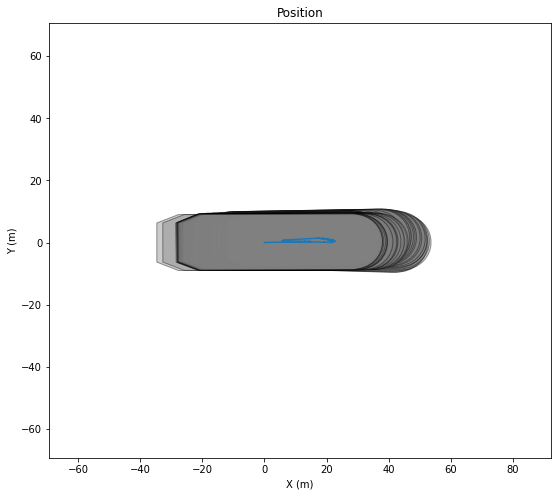

In [15]:
data = pd.DataFrame({'t': serie_t, 'px': serie_x, 'py': serie_y, 'yaw': serie_yaw})

def plot_ghost_vessels(data):
    import math
    import matplotlib.pyplot as plt
    import matplotlib.path as mpath
    import matplotlib.patches as mpatches
    import pandas as pd

    plt.rcParams["figure.figsize"] = (16,8)
    fig, (ax1) = plt.subplots(1, 1)
    ax1.set_aspect('equal')

    Path = mpath.Path
    path_data = [
        (Path.MOVETO, [0.0, -0.5]),
        (Path.LINETO, [-0.35, -0.5]),
        (Path.LINETO, [-0.5, -0.4]),
        (Path.LINETO, [-0.5, -0.35]),
        (Path.LINETO, [-0.5, 0.3]),
        (Path.CURVE4, [-0.5, 0.5]),
        (Path.CURVE4, [0.5, 0.5]),
        (Path.LINETO, [0.5, 0.3]),
        (Path.LINETO, [0.5, 0.3]),
        (Path.LINETO, [0.5, -0.35]),
        (Path.LINETO, [0.5, -0.4]),
        (Path.LINETO, [0.35, -0.5]),
        (Path.CLOSEPOLY, [0.0, -0.5])
    ]

    codes, verts = zip(*path_data)
    ship = [[x[0] * my_vessel.breadth, x[1] * my_vessel.length] for x in verts]

    for key, t in enumerate(data['t']):
        if (key % 100) == 0:
            alpha = data['yaw'][key] - math.pi/2
            item = [[x[0] * math.cos(alpha) - x[1] * math.sin(alpha), 
                x[0] * math.sin(alpha) + x[1] * math.cos(alpha)] for x in ship]
            item = [[x[0] + data['px'][key], x[1] + data['py'][key]] for x in item]

            path = mpath.Path(item, codes)
            patch = mpatches.PathPatch(path, facecolor='gray', alpha=0.4)
            ax1.add_patch(patch)

    ax1.plot(data['px'], data['py'])

    ax1.set_title("Position")
    ax1.set_xlabel("X (m)")
    ax1.set_ylabel("Y (m)")

    ax1.set_ylim(data['py'].min() - my_vessel.length, data['py'].max() + my_vessel.length)
    ax1.set_xlim(data['px'].min() - my_vessel.length, data['px'].max() + my_vessel.length)

    plt.show()

## Exemplo inHouse DP 2

Aplicação de um degrau de 10.0m em Surge com os ganhos do controlador Surge definidos em código (Proporcional=5.0k N/m, Integral=0.1 kN/m.s, Derivativo=900.0 kN.s/m). Os valores sobreescrevem os valores do arquivo P3D.

É possível configurar os ganhos individualmente para cada grau de liberdade no plano horizontal (Surge, Sway e Yaw)

In [17]:
import inhousedp
import math

my_dyna.reset()
my_vessel = my_dyna.vessels['42']
my_thrusters = list(my_vessel.thrusters)
my_vessel.linear_position = [0.0, 0.0, -6.6]
my_vessel.angular_position = [0.0, 0.0, 0.0]
print(my_vessel.linear_position)
print(my_vessel.angular_position)
print(my_thrusters)

my_dp = inhousedp.InhouseDP("D:/Users/betomaki/Desktop/grupo_code/20201216_evento_pydyna/example/Maersk Handler.p3d", 42)

serie_t_2 = []
serie_x_2 = []
serie_y_2 = []
serie_yaw_2 = []

my_dp.setgains(inhousedp.Dof.SURGE.value, 5.0, 0.1, 900.0)
my_dp.setreference([10.0, 0.0, 0.0])

for cycle in range(6000):
    serie_t_2.append(my_dyna.get_time_step() * my_dyna.get_dt())
    serie_x_2.append(my_vessel.linear_position[0])
    serie_y_2.append(my_vessel.linear_position[1])
    serie_yaw_2.append(my_vessel.angular_position[2])

    my_var = my_dp.dostep([
        my_vessel.linear_position[0],
        my_vessel.linear_position[1],
        my_vessel.angular_position[2]
    ])
    for one_thr in my_thrusters:
        my_vessel.thrusters[one_thr].dem_rotation = my_var[one_thr].getDemandedRps()
        my_vessel.thrusters[one_thr].dem_pitch = my_var[one_thr].getDemandedPod()
        my_vessel.thrusters[one_thr].dem_angle = my_var[one_thr].getDemandedAzimuth()
    
    my_dyna.step()

[ 0.   0.  -6.6]
[0. 0. 0.]
['0', '1', '14', '4', '5']


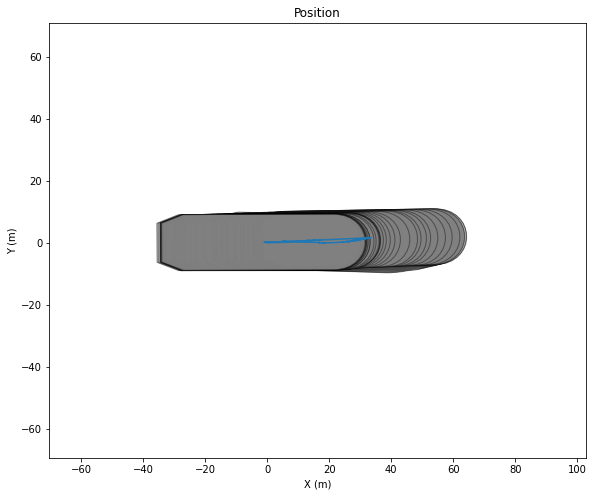

In [18]:
import math
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import pandas as pd

plt.rcParams["figure.figsize"] = (16,8)
data = pd.DataFrame({'t': serie_t_2, 'px': serie_x_2, 'py': serie_y_2, 'yaw': serie_yaw_2})
fig, (ax1) = plt.subplots(1, 1)
ax1.set_aspect('equal')

Path = mpath.Path
path_data = [
    (Path.MOVETO, [0.0, -0.5]),
    (Path.LINETO, [-0.35, -0.5]),
    (Path.LINETO, [-0.5, -0.4]),
    (Path.LINETO, [-0.5, -0.35]),
    (Path.LINETO, [-0.5, 0.3]),
    (Path.CURVE4, [-0.5, 0.5]),
    (Path.CURVE4, [0.5, 0.5]),
    (Path.LINETO, [0.5, 0.3]),
    (Path.LINETO, [0.5, 0.3]),
    (Path.LINETO, [0.5, -0.35]),
    (Path.LINETO, [0.5, -0.4]),
    (Path.LINETO, [0.35, -0.5]),
    (Path.CLOSEPOLY, [0.0, -0.5])
]

codes, verts = zip(*path_data)
ship = [[x[0] * my_vessel.breadth, x[1] * my_vessel.length] for x in verts]

for key, t in enumerate(data['t']):
    if (key % 100) == 0:
        alpha = data['yaw'][key] - math.pi/2
        item = [[x[0] * math.cos(alpha) - x[1] * math.sin(alpha), 
            x[0] * math.sin(alpha) + x[1] * math.cos(alpha)] for x in ship]
        item = [[x[0] + data['px'][key], x[1] + data['py'][key]] for x in item]

        path = mpath.Path(item, codes)
        patch = mpatches.PathPatch(path, facecolor='gray', alpha=0.4)
        ax1.add_patch(patch)

ax1.plot(data['px'], data['py'])

ax1.set_title("Position")
ax1.set_xlabel("X (m)")
ax1.set_ylabel("Y (m)")

ax1.set_ylim(data['py'].min() - my_vessel.length, data['py'].max() + my_vessel.length)
ax1.set_xlim(data['px'].min() - my_vessel.length, data['px'].max() + my_vessel.length)


plt.show()